# Projeto - NLP (Análise de sentimentos utilizando base de dados do Twitter)

## Imports

In [1]:
import pandas as pd
import string
import spacy
import random
import seaborn as sns
import numpy as np
import re

## Base de treinamento

In [2]:
base_treinamento = pd.read_csv('Train50.csv', on_bad_lines='skip', delimiter=';')

In [3]:
base_treinamento.shape

(50000, 5)

In [4]:
base_treinamento.head()

,id,tweet_text,tweet_date,sentiment,query_used
0,1050785521201541121,@Laranjito76 A pessoa certa para isso seria o ...,Fri Oct 12 16:29:25 +0000 2018,1,:)
1,1050785431955140608,"@behin_d_curtain Para mim, é precisamente o co...",Fri Oct 12 16:29:04 +0000 2018,1,:)
2,1050785401248645120,Vou fazer um video hoje... estou pensando em f...,Fri Oct 12 16:28:56 +0000 2018,1,:)
3,1050785370982547461,"aaaaaaaa amei tanto essas polaroids, nem sei e...",Fri Oct 12 16:28:49 +0000 2018,1,:)
4,1050785368902131713,Valoriza o coração do menininho que vc tem. El...,Fri Oct 12 16:28:49 +0000 2018,1,:)


<Axes: ylabel='count'>

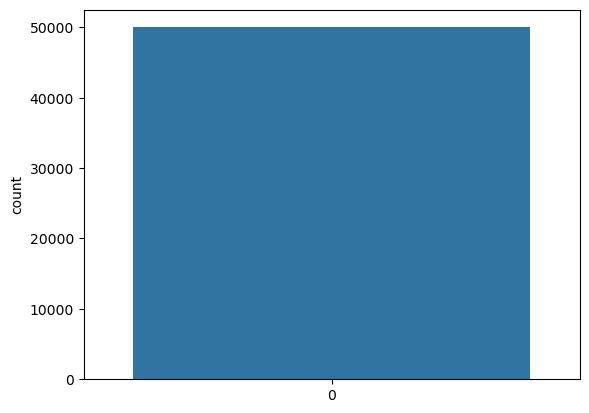

In [5]:
sns.countplot(base_treinamento['sentiment'], label = 'Contagem')

In [6]:
# Deletando as colunas que não serão utilizadas
base_treinamento.drop(['id', 'tweet_date', 'query_used'], axis = 1, inplace = True)

In [7]:
base_treinamento.head()

,tweet_text,sentiment
0,@Laranjito76 A pessoa certa para isso seria o ...,1
1,"@behin_d_curtain Para mim, é precisamente o co...",1
2,Vou fazer um video hoje... estou pensando em f...,1
3,"aaaaaaaa amei tanto essas polaroids, nem sei e...",1
4,Valoriza o coração do menininho que vc tem. El...,1


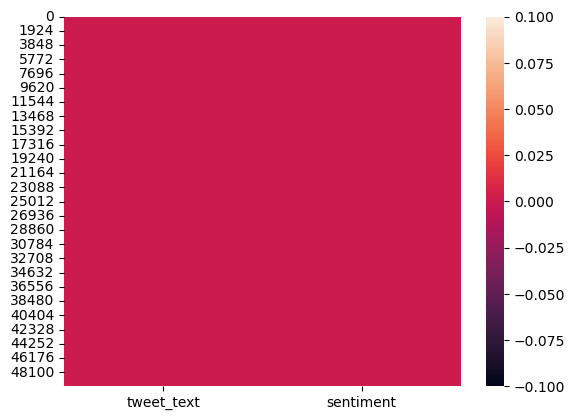

In [8]:
sns.heatmap(pd.isnull(base_treinamento));

## Base de teste

In [9]:
base_teste = pd.read_csv('Test.csv', delimiter=';')

In [10]:
base_teste.head()

,id,tweet_text,tweet_date,sentiment,query_used
0,1029536486021099522,@Gazo1a Nossa! Muito obrigada :),Wed Aug 15 01:13:20 +0000 2018,1,:)
1,1029536496368406528,@BerzGamer vai pa puta que te pariu :),Wed Aug 15 01:13:23 +0000 2018,1,:)
2,1029536531655131137,QUER MAIS DESCONTOS? (14/08) ⭐⭐⭐⭐⭐ 🌐 Confira n...,Wed Aug 15 01:13:31 +0000 2018,1,:)
3,1029536560117678081,"EU VOU PEGAR VCS, ME AJUDEM GALERA, PELO AMOR ...",Wed Aug 15 01:13:38 +0000 2018,1,:)
4,1029536605852377088,Estávamos em casa do Zé e eu estava a morrer d...,Wed Aug 15 01:13:49 +0000 2018,1,:)


In [11]:
base_teste.shape

(5000, 5)

In [12]:
base_teste.drop(['id', 'tweet_date', 'query_used'], axis = 1, inplace=True)

In [13]:
base_teste.head()

,tweet_text,sentiment
0,@Gazo1a Nossa! Muito obrigada :),1
1,@BerzGamer vai pa puta que te pariu :),1
2,QUER MAIS DESCONTOS? (14/08) ⭐⭐⭐⭐⭐ 🌐 Confira n...,1
3,"EU VOU PEGAR VCS, ME AJUDEM GALERA, PELO AMOR ...",1
4,Estávamos em casa do Zé e eu estava a morrer d...,1


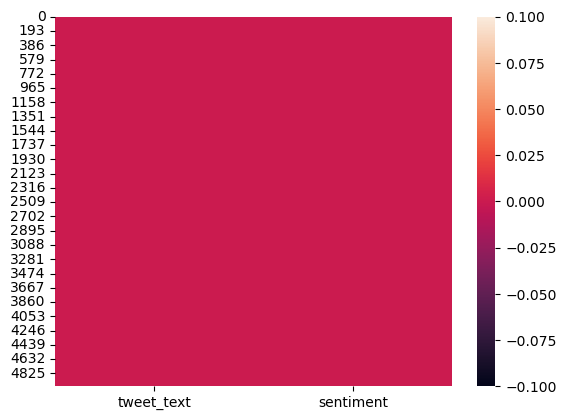

In [14]:
sns.heatmap(pd.isnull(base_teste));

## Pré-processamento dos textos

- Letras minúsculas
- Nome do usuário (@)
- URLs
- Espaços em branco
- Emoticons
- Stop words
- Lematização
- Pontuações

In [15]:
pln = spacy.load('pt_core_news_sm')
pln

In [16]:
from spacy.lang.pt.stop_words import STOP_WORDS
stop_words = STOP_WORDS

In [17]:
def preprocessamento(texto):
    # Letras minúsculas
    texto = texto.lower()
    
    # Nome do usuário
    texto = re.sub(r"@[A-Za-z0-9$-_@.&+]+", ' ', texto)
    
    # URLs
    texto = re.sub(r"https?://[A-Za-z0-9./]+", ' ', texto)
    
    # Espaços em branco
    texto = re.sub(r" +", ' ', texto)
    
    # Emoticons
    lista_emocoes = {':)': 'emocaopositiva',
                    ':d': 'emocaopositiva',
                    ':(': 'emocaonegativa'}
    for emocao in lista_emocoes:
        texto = texto.replace(emocao, lista_emocoes[emocao])
        
    # Lematização
    documento = pln(texto)
    
    lista = []
    for token in documento:
        lista.append(token.lemma_)
        
    # Stop words e pontuações
    lista = [palavra for palavra in lista if palavra not in stop_words and palavra not in string.punctuation]
    lista = ' '.join([str(elemento) for elemento in lista if not elemento.isdigit()])
    
    return lista

## Pré-processamento da base de dados

### Limpeza dos textos

In [18]:
base_treinamento.head()

,tweet_text,sentiment
0,@Laranjito76 A pessoa certa para isso seria o ...,1
1,"@behin_d_curtain Para mim, é precisamente o co...",1
2,Vou fazer um video hoje... estou pensando em f...,1
3,"aaaaaaaa amei tanto essas polaroids, nem sei e...",1
4,Valoriza o coração do menininho que vc tem. El...,1


In [19]:
base_treinamento['tweet_text'] = base_treinamento['tweet_text'].apply(preprocessamento)

In [20]:
base_treinamento.head(10)

,tweet_text,sentiment
0,pessoa certo vale azevedo emocaopositivo,1
1,precisamente contrário emocaopositiva vir ch...,1
2,video hoje ... pensar falar meta de o csgo pag...,1
3,Aaaaaaaa amei polaroids expressar to apaixonar...,1
4,valorizar coração de o menininho vc diferente ...,1
5,amiga to emocaopositivo,1
6,bravo jairo emocaopositivo,1
7,socorro ksoaksosks achar to em o caixinha so...,1
8,gostar fazenda emocaopositivo morro medo gal...,1
9,amanha venom emocaopositivo,1


In [21]:
base_teste['tweet_text'] = base_teste['tweet_text'].apply(preprocessamento)

In [22]:
base_teste.head(10)

,tweet_text,sentiment
0,emocaopositivo,1
1,pa puta parir emocaopositiva,1
2,querer desconto 14/08 ⭐ ⭐ ⭐ ⭐ ⭐ 🌐 confiro em o...,1
3,vcs ajudar galera por o amor butera emocaoposi...,1
4,casa de o zé morrer sono chegar casa fico sono...,1
5,precisar emocaopositivo,1
6,acaso adorar beijo abraço hahahahaha bue fof...,1
7,solteiro s sozinho emocaopositivo,1
8,lindeza cortador kit Mário coleção ber Cravol ...,1
9,claro emocaopositivo,1


### Tratamento da classe

In [23]:
base_dados_treinamento_final = []
for texto, emocao in zip(base_treinamento['tweet_text'], base_treinamento['sentiment']):
    if emocao == 1:
        dic = ({'POSITIVO': True, 'NEGATIVO': False})
    elif emocao == 0:
        dic = ({'POSITIVO': False, 'NEGATIVO': True})
    base_dados_treinamento_final.append([texto, dic.copy()])

In [24]:
len(base_dados_treinamento_final)

50000

In [25]:
base_dados_treinamento_final[10:15]

[['simplesmente deixar chatear querer muitooo iludir emocaopositivo',
  {'POSITIVO': True, 'NEGATIVO': False}],
 ['começar rotina perfeitamente consolidar escola condução :p',
  {'POSITIVO': True, 'NEGATIVO': False}],
 ['amigo parecer apaixonado vc — recíproco emocaopositivo',
  {'POSITIVO': True, 'NEGATIVO': False}],
 ['  gajo bacano aleija esperar Silva feliz emocaopositivo',
  {'POSITIVO': True, 'NEGATIVO': False}],
 ['tar video cabrinha bebé emocaopositivo',
  {'POSITIVO': True, 'NEGATIVO': False}]]

In [26]:
base_dados_treinamento_final[45000:45005]

[['menino de o pijama listrar filme triste de o mundo estrutura nenhum pra assistir rever to pensar em isso emocaonegativo',
  {'POSITIVO': False, 'NEGATIVO': True}],
 ['pra vídeo de o Luísa Raiz poliana infelizmente twitter tá ruim amanhã postar emocaonegativo asaventurasdepoliana099',
  {'POSITIVO': False, 'NEGATIVO': True}],
 ['to crise abstinência stranger emocaonegativo — tbm :/ to',
  {'POSITIVO': False, 'NEGATIVO': True}],
 ['  esquecer olhar pra pagar mensalidade turma pro curso querer emocaonegativo',
  {'POSITIVO': False, 'NEGATIVO': True}],
 ['querer comer doce comi monte hoje emocaonegativo maldição',
  {'POSITIVO': False, 'NEGATIVO': True}]]

## Criação do classificador

In [27]:
modelo = spacy.blank('pt')
categorias = modelo.add_pipe("textcat")
categorias.add_label("POSITIVO")
categorias.add_label("NEGATIVO")
historico = []

In [28]:
from spacy.training import Example

In [29]:
modelo.begin_training()
for epoca in range(5):
    random.shuffle(base_dados_treinamento_final)
    losses = {}
    for batch in spacy.util.minibatch(base_dados_treinamento_final, 512):
        textos = [modelo(texto) for texto, entities in batch]
        annotations = [{'cats': entities} for texto, entities in batch]
        examples = [Example.from_dict(doc, annotation) for doc, annotation in zip(textos, annotations)]
        modelo.update(examples, losses=losses)
        historico.append(losses)
    if epoca % 5 == 0:
        print(losses)

{'textcat': 1.8036449665287364}


In [30]:
historico_loss = []
for i in historico:
    historico_loss.append(i.get('textcat'))

In [31]:
historico_loss = np.array(historico_loss)
historico_loss

array([1.80364497, 1.80364497, 1.80364497, 1.80364497, 1.80364497,
       1.80364497, 1.80364497, 1.80364497, 1.80364497, 1.80364497,
       1.80364497, 1.80364497, 1.80364497, 1.80364497, 1.80364497,
       1.80364497, 1.80364497, 1.80364497, 1.80364497, 1.80364497,
       1.80364497, 1.80364497, 1.80364497, 1.80364497, 1.80364497,
       1.80364497, 1.80364497, 1.80364497, 1.80364497, 1.80364497,
       1.80364497, 1.80364497, 1.80364497, 1.80364497, 1.80364497,
       1.80364497, 1.80364497, 1.80364497, 1.80364497, 1.80364497,
       1.80364497, 1.80364497, 1.80364497, 1.80364497, 1.80364497,
       1.80364497, 1.80364497, 1.80364497, 1.80364497, 1.80364497,
       1.80364497, 1.80364497, 1.80364497, 1.80364497, 1.80364497,
       1.80364497, 1.80364497, 1.80364497, 1.80364497, 1.80364497,
       1.80364497, 1.80364497, 1.80364497, 1.80364497, 1.80364497,
       1.80364497, 1.80364497, 1.80364497, 1.80364497, 1.80364497,
       1.80364497, 1.80364497, 1.80364497, 1.80364497, 1.80364

Text(0, 0.5, 'Erro')

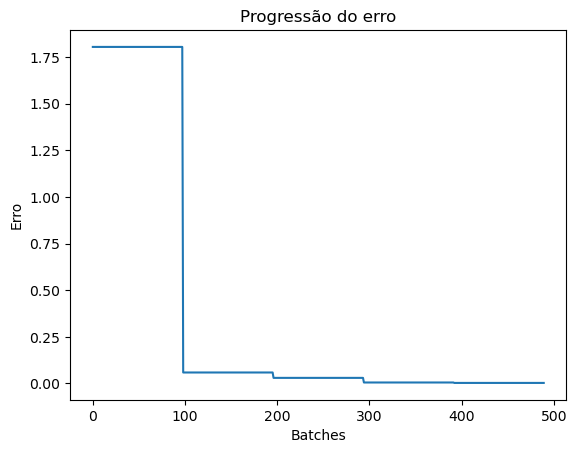

In [32]:
import matplotlib.pyplot as plt
plt.plot(historico_loss)
plt.title('Progressão do erro')
plt.xlabel('Batches')
plt.ylabel('Erro')

In [33]:
modelo.to_disk("modelo")

## Testes com uma frase

### Texto positivo

In [34]:
modelo_carregado = spacy.load("modelo")
modelo_carregado

In [35]:
texto_positivo = base_teste['tweet_text'][21]
texto_positivo

'  fico feliz q recíproco emocaopositivo'

In [36]:
previsao = modelo_carregado(texto_positivo)
previsao

  fico feliz q recíproco emocaopositivo

In [37]:
previsao.cats

{'POSITIVO': 1.0, 'NEGATIVO': 4.9260780343729493e-08}

In [38]:
texto_positivo = 'eu gosto muito de você'
texto_positivo = preprocessamento(texto_positivo)
texto_positivo

'gostar'

In [39]:
modelo_carregado(texto_positivo).cats

{'POSITIVO': 0.9742851853370667, 'NEGATIVO': 0.02571478858590126}

### Texto negativo

In [40]:
base_teste['tweet_text'][4000]

'tô triste de o filme de o mulan mushu emocaonegativo'

In [41]:
texto_negativo = base_teste['tweet_text'][4000]
previsao = modelo_carregado(texto_negativo)
previsao

tô triste de o filme de o mulan mushu emocaonegativo

In [42]:
previsao.cats

{'POSITIVO': 1.1883741102280965e-08, 'NEGATIVO': 1.0}

## Avaliação do modelo

In [43]:
previsoes = []
for texto in base_teste['tweet_text']:
    previsao = modelo_carregado(texto)
    previsoes.append(previsao.cats)

In [44]:
previsoes_final = []
for previsao in previsoes:
    if previsao["POSITIVO"] > previsao["NEGATIVO"]:
        previsoes_final.append(1)
    else:
        previsoes_final.append(0)
        
previsoes_final = np.array(previsoes_final)

In [45]:
respostas_reais = base_teste['sentiment'].values

In [46]:
from sklearn.metrics import accuracy_score
accuracy_score(respostas_reais, previsoes_final)

0.9964

In [47]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(respostas_reais, previsoes_final)
cm

array([[2493,    7],
       [  11, 2489]], dtype=int64)

<Axes: >

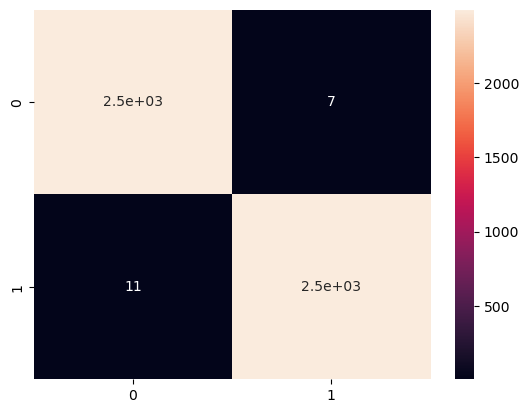

In [48]:
sns.heatmap(cm, annot=True)